In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv', index_col = 0)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.shape

(1460, 80)

In [4]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

** Lots of columns have missing entries and some columns have very less entries...need further investigation.**

**Problem** : ** Supervised Regression Problem**

**Predict sales price (dependent variable) of houses given 79 other independent variables.**

After Reading Data Description I conclude that Overallqual, yearbuilt, garageCars, utilities may explain better sales price.

** Lets check correlation matrix**

In [6]:
corr_matrix = train_data.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

** Analyse Target Variable**

In [7]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

** No missing entries, Right skewed
   **

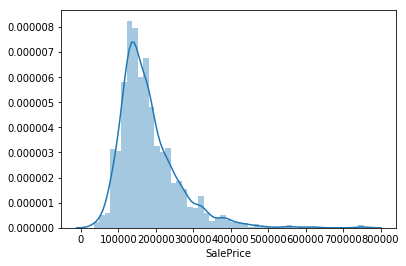

In [8]:
sns.distplot(train_data['SalePrice'],  norm_hist=True)

**Normality Testing**

In [9]:
print('Skewness: ', train_data['SalePrice'].skew())
print('\n')
print('Kurtosis:', train_data['SalePrice'].kurt())

Skewness:  1.8828757597682129


Kurtosis: 6.536281860064529


Normal Distributuons have accetable kurtosis value of 3. A value greater than 3 shows that there is a lot of data in tails or distribution is heavy tailed.

If skewness is -1 to 1 then consider moderately skewed.
if skewness is greater than -1 or greater than +1 then highly skewed.
if skewness is between -0.5 to +0.5 then consider near to normal.

**Now OverallQual and its relation with Target**

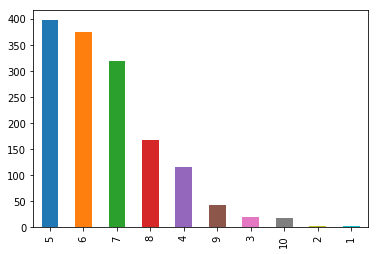

In [10]:
train_data['OverallQual'].value_counts().plot.bar()

(-0.5, 9.5, 0, 800000)

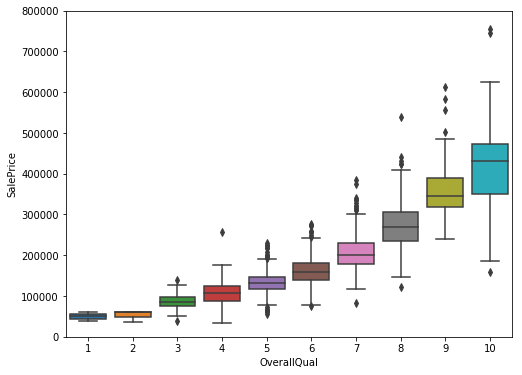

In [11]:
fig, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = train_data['OverallQual'], y = train_data['SalePrice'])
fig.axis(ymin=0, ymax=800000)

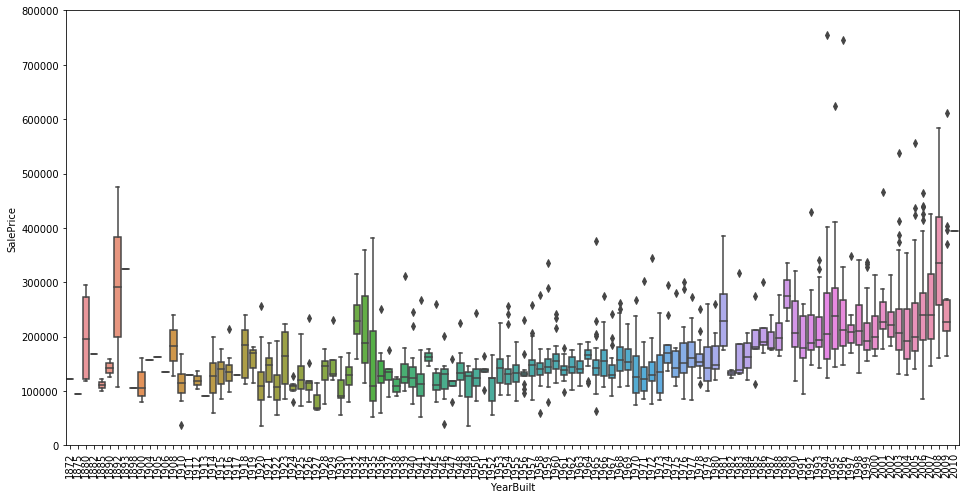

In [12]:
var = 'YearBuilt'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

YearBuilt and OverallQuality both have strong relation with SalesPrice and OverallQulaity have stronger impact on SalesPrice.

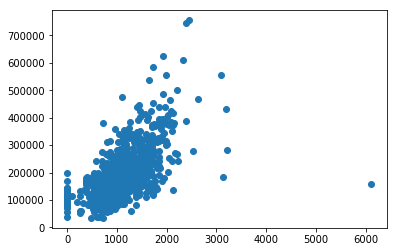

In [13]:
plt.scatter(x = train_data['TotalBsmtSF'], y = train_data['SalePrice'])
plt.show()

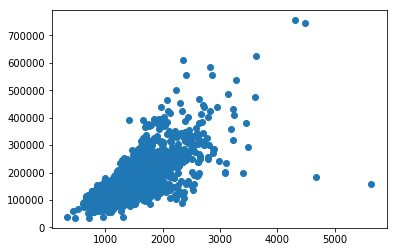

In [14]:
plt.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.show()

So, both GrLivArea and TotalBsmtSF have linear relationship with Salesprice and TotalbsmtSF is capped at zero.

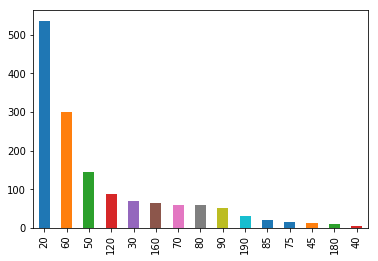

In [15]:
train_data.MSSubClass.value_counts().plot.bar()

In [16]:
train_data.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

** Now as some of the important features have been explored, still there are many features left that need exploration. So, heatmap is a good option.**

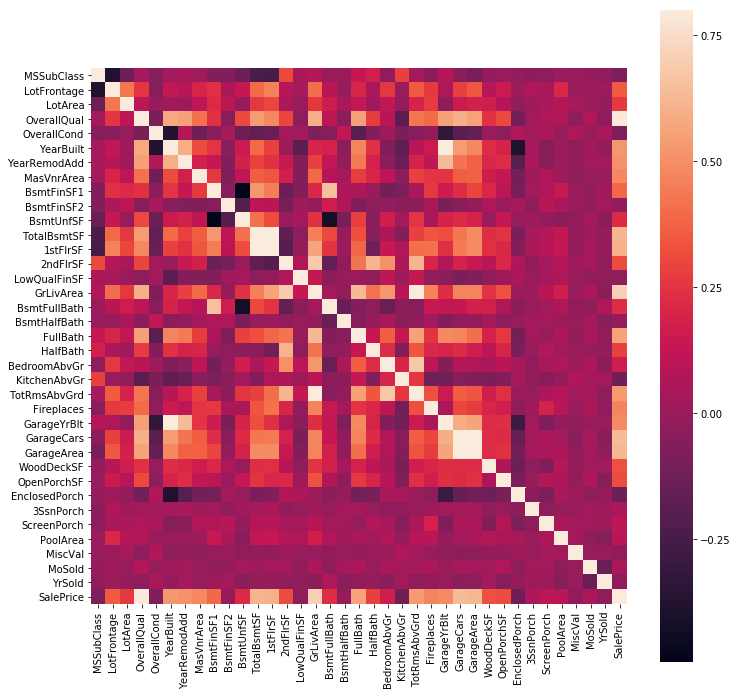

In [17]:
corr_mat =  train_data.corr()
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(corr_mat, vmax = 0.8, square= True)

**Multicollinearity is present in Data.**
After seeing heatmap, I observed some strong correlation between Grvid and TotrmsAbvGr, Garageyrbuilt and Yearbuilt.

There are many features which have less correlation with target variable like MSSubClass, OverallCond, BsmtfinSF2, LowQualFinsF and many more. Needs more investigation.

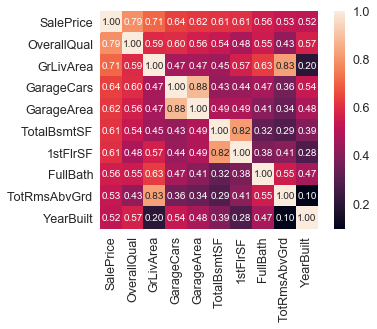

In [18]:
k = 10
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

** Keep GarageCars, drop GarageArea**

** keep TotalBsmtSF and drop 1stFlrSF**

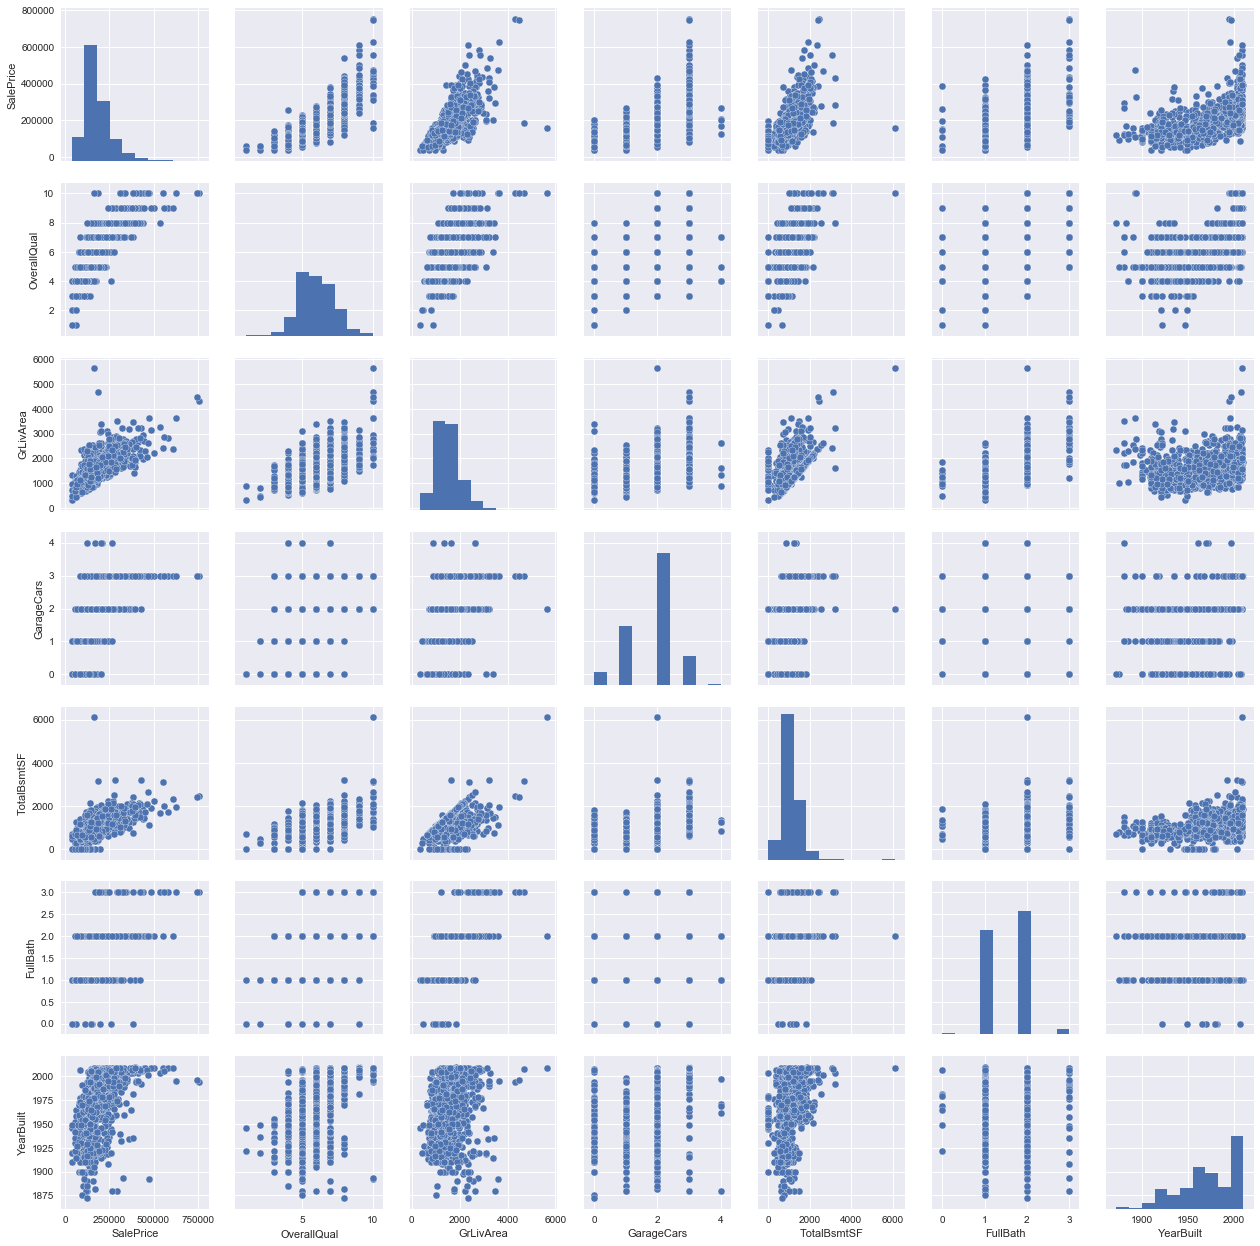

In [19]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show()

**Missing Values Treatment**

In [20]:
train_data.columns[train_data.isnull().sum()!=0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

#### So basically these columns have missing values. Lets check number of missing values in these columns.

In [21]:
total= train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending = False) * 100
total_missing = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent_Missing'])
total_missing

,Total,Percent_Missing
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageCond,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


**Before imputing missing values, I am dropping correlated features and features that have almost all data missing.**

If more than 15% of data is missing, then its better to remove the variable. variables starting with Garage have almost similar missing entries, and GarageCars is the most important variable among them, so its better to remove. same appies for BmstX variabes. Electrical column has only one missing entry so droping observation. 

LotFrontage is a descent variable and have 0.3 correlation with sales price but it is correlated with other variables too, so not loosing information if I remove the variable.

In [22]:
train_data.drop(['GarageArea','1stFlrSF','Alley','PoolQC','Fence','MiscFeature','TotRmsAbvGrd','FireplaceQu','GarageType',
                              'GarageCond','GarageFinish','GarageQual','GarageYrBlt','BsmtFinSF2','BsmtExposure','BsmtQual','BsmtCond',
                              'BsmtFinType1','MasVnrArea','MasVnrType','BsmtFinType2','LotFrontage'], axis = 1, inplace = True)


In [23]:
train_data.drop(train_data.loc[train_data['Electrical'].isnull()].index, inplace = True)

In [24]:
train_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


**Checking Assumptions of Linear Regression**

**Normality** - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

**Homoscedasticity** - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

**Linearity**- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

**Absence of correlated errors** - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

**Multicollinearity** - Predictors should not be correlated to each other. In real datastet this can not be achieved completely as Independent variables will be somehow correlated to each other.

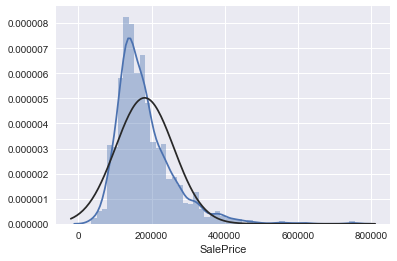

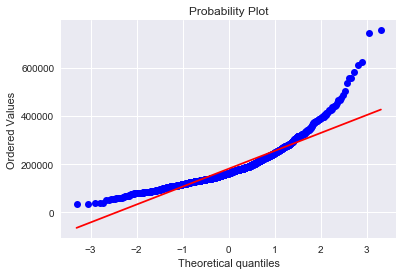

In [25]:
from scipy.stats import probplot
from scipy.stats import norm
sns.distplot(train_data['SalePrice'], fit= norm)

fig = plt.figure()

res = probplot(train_data['SalePrice'], plot = plt)

<b>Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.</b>

In [26]:
#applying log transformation
train_data['SalePrice'] = np.log(train_data['SalePrice'])

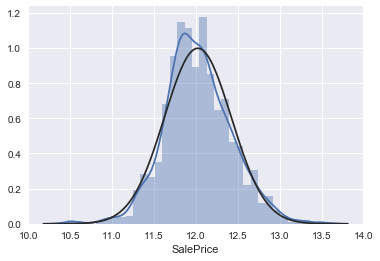

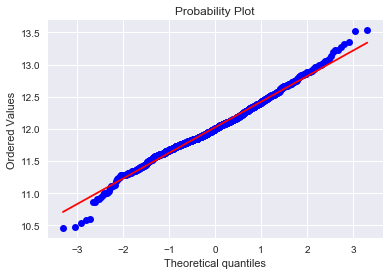

In [27]:
#transformed histogram and normal probability plot
sns.distplot(train_data['SalePrice'], fit=norm);
fig = plt.figure()
res = probplot(train_data['SalePrice'], plot=plt)

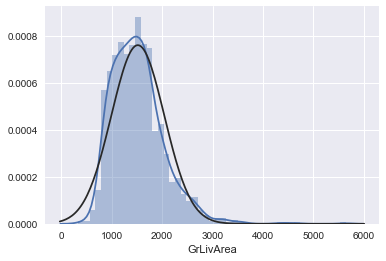

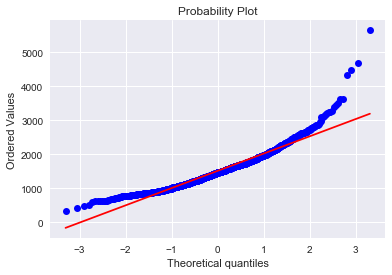

In [28]:
#histogram and normal probability plot
sns.distplot(train_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = probplot(train_data['GrLivArea'], plot=plt)

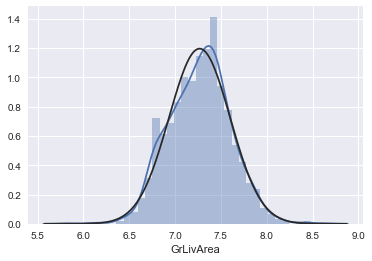

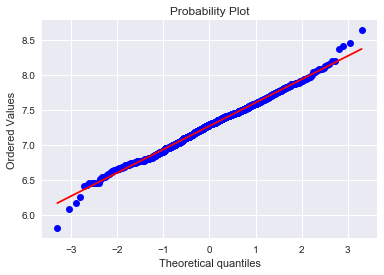

In [29]:
#data transformation
train_data['GrLivArea'] = np.log(train_data['GrLivArea'])

#transformed histogram and normal probability plot
sns.distplot(train_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = probplot(train_data['GrLivArea'], plot=plt)

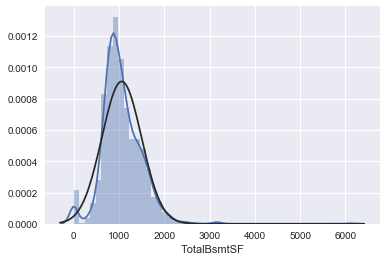

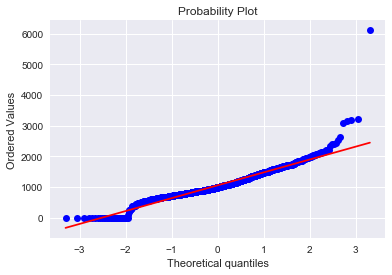

In [30]:
#histogram and normal probability plot
sns.distplot(train_data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = probplot(train_data['TotalBsmtSF'], plot=plt)

A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

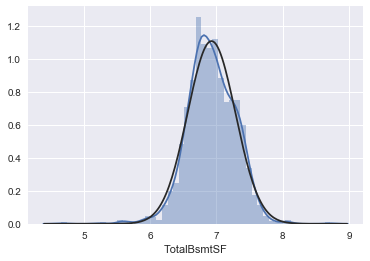

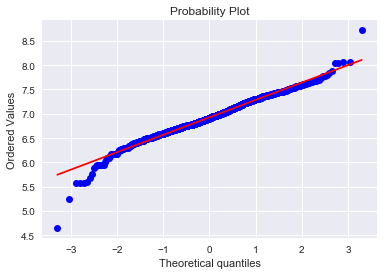

In [31]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train_data['HasBsmt'] = pd.Series(len(train_data['TotalBsmtSF']), index=train_data.index)
train_data['HasBsmt'] = 0 
train_data.loc[train_data['TotalBsmtSF']>0,'HasBsmt'] = 1


#transform data
train_data.loc[train_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_data['TotalBsmtSF'])

#histogram and normal probability plot
sns.distplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = probplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

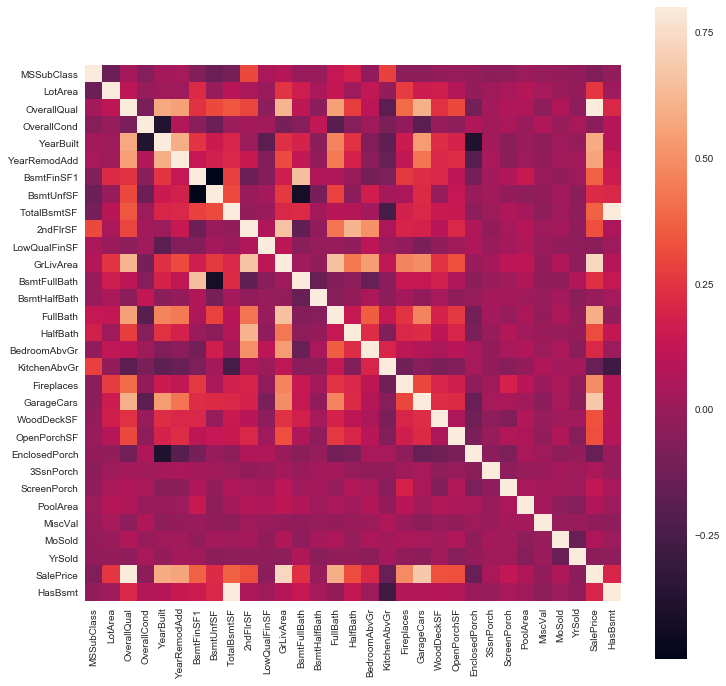

In [32]:
corr_mat =  train_data.corr()
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(corr_mat, vmax = 0.8, square= True)

As we can see TotalBsmtsF is highly correlated with hasBsmt, so dropping TotalBsmtsF.

In [33]:
# drop column TotalBsmtsF

train_data.drop('TotalBsmtSF', axis = 1, inplace = True)

#### Some numerical features are actually categorical

In [36]:
train_data = train_data.replace({'MSSubClass':{20: "SC20", 30: 'SC30', 40 : "SC40", 45 : "SC45", 
                                               50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                               80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                               150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                                   "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 
                                               6 : "Jun", 7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 
                                               11 : "Nov", 12 : "Dec"}
                      })

#### Separate categorical and numerical features

In [54]:
categorical = train_data.select_dtypes(include = ['object']).columns

numerical = train_data.select_dtypes(exclude= ['object']).columns

print('Numerical Features: ' + str(len(numerical)))

print('Categorical Features: ' + str(len(categorical)))

Numerical Features: 28
Categorical Features: 30
